## Linear Regression and Correlation

So far we have covered basic statistical hypothesis testing when we have categorical dependant variables with categorical independent variables (Chi Squared Test), as well as continuous dependent variables with cateogorical independant variables (T-test). 

Today we will cover cases of continous dependant variables, and continous independant variables.

But first, a quick detour to explore some common statistical errors.

#### Type 1 and Type 2 Errors

When we incorrectly reject or do not reject a null hypothesis, we are making an error.

In statistical terms, these are type I and type II errors.

| Decision       | $H_0$ true|   $H_0$ false |
| ------------- |:-------------:| -----:|
| Reject $H_0$ | Type I |Correct|
| Do not reject $H_0$  |Correct|Type II|

A type I error is a 'false positive'; we have rejected the null hypothesis, and poisited an effect where there is not one.

A type II error is a 'false negative'; we have failed to reject the null hypothesis when it was not true.

It is useful to try and remember this terminology, we will loop back to it later during the machine learning section of the course.


#### Multiple Testing

So far, with T-tests we have covered tests between single groups. What if we have to test between a lot of different groups? 

Could we just take each subgroup, and test against the null hypothesis?

Sure, but remember what our p-value means. We already have 1/20 chance of a false positive.

As you increase the number of comparisons you increase the number of those that will be significant by chance.

**Example:**  Take the generic example of doing 100 comparisons using a significance threshold of 0.05. Now, a p-value of 0.05 means there is a 5% chance of getting that result when the null hypothesis is true. Therefore, if you do these 100 comparisons, you would expect to find 5 genes significant just by random chance.

As such, to avoid making these false-positives (Type 1 Errors) we 'correct' the p-value thereby making the test more conservative.


Let's simulate testing 20 jellybean colours as an acne cure (apologies to http://xkcd.com/882):

In [ ]:
import numpy as np
np.random.seed(1234)
from matplotlib import colors

mycolors = np.random.choice(list(colors.CSS4_COLORS.keys()), 40, replace = True)
#some of these might be a bit exotic....
print(mycolors)
# mycolors.size
# np.unique(mycolors).size

In [ ]:
# here we do 40 individual t-tests
#for every group of colours, we give 30 people jellybeans of that color
from scipy import stats
np.random.seed(2345)
for i in mycolors:
    x = np.random.normal(loc = 0, scale = 1, size = 30)
    pvalue = stats.ttest_1samp(x, 0)[1]
    if pvalue < 0.05:
        print(f'color {i} has a signficant effect on acne!')

So, do we have something wrong here? Not really, it is working as expected, we expect 2 errors in a sample of 40 tests. We have some false positives, type I errors.

To reduce these, we can do an error correction on our tests.

The most basic is the 'Bonferroni Correction'. In this method we simply reduce the critical p-value by the number of tests we have carried out:

In [ ]:
from scipy import stats
np.random.seed(2345)
for i in mycolors:
    x = np.random.normal(loc = 0, scale = 1, size = 30)
    pvalue = stats.ttest_1samp(x, 0)[1]
    if pvalue < 0.05/40:
        print(f'color {i} has a signficant effect on acne!')
    else:
        print(f'color {i} has no signficant effect on acne with P value of {round(pvalue,3)}')
### no significant results!

This runs the risk of inflating our type II error. 

Let's imagine 'peachpuff' jellybeans really do cure acne!:

In [ ]:
from scipy import stats
np.random.seed(2345)
for i in mycolors:
    if i == 'peachpuff':
        x = np.random.normal(loc = 1, scale = 1, size = 30)
    else:
        x = np.random.normal(loc = 0, scale = 1, size = 30)
    pvalue = stats.ttest_1samp(x, 0)[1]
    if pvalue < 0.05/40:
        print(f'color {i} has a signficant effect on acne!')
    else:
        print(f'color {i} has no signficant effect on acne with P value of {round(pvalue,3)}')
        
#it has a p value of 0.002 which is > 0.05/40, but its less than 0.05 so Type II error

We have now commited a type II error. We have a treatment that does work, but we have missed it due to our more stringent cutoff.

A more permissive correction is the **Holm-Bonferroni correction**. In this case, we sort our p-values from largest to smallest, and apply the cut off as 
    
       1/(place in list) times the cutoff

See an example below:

In [ ]:
from scipy import stats
np.random.seed(2345)
pvalues = []
for i in mycolors:
    if i == 'peachpuff':
        x = np.random.normal(loc = 1, scale = 1, size = 30)
    else:
        x = np.random.normal(loc = 0, scale = 1, size = 30)
    pvalue = stats.ttest_1samp(x, 0)[1]
    pvalues.append((pvalue, i))

print(pvalues)
pvalues = sorted(pvalues, key = lambda x: -x[0])
print(pvalues)

Now we can apply our correction:

In [ ]:
counter = 1
for i,j in pvalues:
    print(j,i, 1/counter * 0.05)
    if i < 1/counter * 0.05:
        print(f'{j} is significant, pvalue {i}, counter: {counter}, {1/counter *0.05}')
    counter += 1

There is no hard and fast rule about multiple testing. In general, we have better statistical tests to carry out when we are testing multiple values.

P-hacking, or salami slicing is heavily frowned upon, but somewhat common in scientific research. [A good story focuses on a Cornell Professor Brian Wansink](https://www.buzzfeed.com/stephaniemlee/brian-wansink-cornell-p-hacking), who published work showing, for example, that a larger size plate leads to eating more at a buffet. He has been heavily criticized for his p-hacking.

We will discuss other approaches to testing with multiple values next week.

### Exercises

Our competitors for our retail stores have published that their average spend per visit is \$5.50. We have data for five of our own stores, and want to test if they are significantly different from our competitors store.

1. Which test should we use? Is the test one tailed or two tailed?
2. We have the data as below:

In [ ]:
np.random.seed(1234)
means = [5.5,5.4,5.6,5.5,5.5]
data = [np.random.normal(loc = i, scale = 1, size = 100) for i in means]

In [ ]:
# 1 Since we have our own stores who's avg spend per visit we wish to comapre against $5.50, 
# we would want to use a one-sample t-test. Since we are interesting in seeing if an observed 
# difference is statistically significant, we should use a two-tailed t test.

Carry out the appropriate test on each sample. How many type I errors do we expect? How many do we get?

3. What are the critical p-values under the Holm and Bonferroni corrections?

4. How many significant values do we get under both corrections? What are the type I and II error rates?

In [ ]:
p_vals = []
store = 1
for i in data:
    ttest = stats.ttest_1samp(i, 5.5)
    p_vals.append(((ttest[1]), store))
    if (ttest[1] < 0.05):
        print(f'Store: {store} with a p-value {ttest[1]}, sig level of 0.05 ')
    store+=1    
    
print(p_vals)

#We have multiple groups, so there could be type 1 errors. WIth a group of 5 stores, we expect a false positive rate of 0.05*5 = 0.25 --- so about 1.

In [ ]:
#3 ---- P-values Under Bonferroni

for i,j in p_vals:
    if i < 0.05/5:
        print(f'{j} is significant, pvalue {i} less than sig {0.05/5}')
    counter += 1
    

In [ ]:
#3 ---- P-values Under Holm-Bonferroni
p_vals_sorted = sorted(p_vals, key = lambda x: -x[0])
p_vals_sorted

counter = 1
for i,j in p_vals_sorted:
    print(j,i, 1/counter * 0.05)
    if i < 1/counter * 0.05:
        print(f'{j} is significant, pvalue {i}, less than sig lvl: {1/counter *0.05}')
    counter += 1

In [ ]:
import pandas as pd
p_df = pd.DataFrame(p_vals_sorted, index = np.arange(1,6), columns=('P Value', 'Store Number'))
#print(p_df)
p_df['p_val cutoff'] = 0.05/np.arange(1,6)
#print(p_df)

p_df['Null Rejected'] = p_df['P Value']<p_df['p_val cutoff']
print(p_df)

### Correlation and Covariance

When presented with continuous dependant and independant variables, the first thing to do is to plot them out:

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

x = np.random.normal(size = 100)
y = np.random.normal(size = 100)

plt.scatter(x,y);

A more likely example might have some interaction between the terms:

In [ ]:
x = np.random.normal(size = 100)
y = 3 * x + np.random.normal(scale = 3, size = 100)

plt.scatter(x,y);

We can investigate the relationship between the two variables in a number of ways.

First, we can measure the covariance, a measure of how the two values co-vary. Covariance measures the strength of association between two numerical variables.

The formula for (sample) covariance is (note: population is (1/n)): 

$$ \text{Cov(x,y)} = \frac{1}{n-1}\sum\limits_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y}) $$

We can see this is very similar to our formula for (sample) variance:

$$ \sigma^2 = \frac{1}{n-1}\sum\limits_{i=1}^n (x_i-\overline{x})^2 $$

Rather than square our $x - \overline{x}$ we have multiplied it by the y.

In [ ]:
np.cov(x, y)

Correlation normalizes this value. We don't really know how large a covariance is, as it scales with the values.

Correlation measures strength, and direction of a linear association between two variables.

$\text{Cor}(X,Y) = \frac{\text{Cov(X,Y)}}{\text{SD}(X)\text{SD}(Y)}$

In [40]:
print(np.corrcoef(x,y))
corr = np.corrcoef(x,y)[0,1]
print(corr)

[[1.         0.68639862]
 [0.68639862 1.        ]]
0.6863986153212568


A good intuition for a correlation coefficient is 'The degree of variation in one dimension that is explained by the other variable'. Correlation coefficient is not the slope of the line:

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg">

We can test whether a correlation is significant by using a T-test. We calculate the T-statistic using the formula:

$$ t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}} $$

Where r is the correlation coefficient, and n is the number of samples. The intuition for this test is that we are measuring how the variances of the data vary, but not correcting for small sample sizes. If we only have two points, the correlation will be 1, but it is unlikely to be a real effect.

**The number of degrees of freedom of this test is n-2 - we lose one df for each of x and y. Notice that degrees of freedom is n-2 because if you only had
2 points, then you can easily have a straight line connecting them.**

In [ ]:
tval = corr * np.sqrt((len(x)-2)/(1- corr **2))
print(tval)

p = stats.t.sf(tval, len(x)-2)*2 #two tailed!
print(p)

#We can use the Stats package\s Pearson-R test to get the same result
#We input our 2 attributes/features/data-columns we want to test for correlation
#Our 2 output are (correlation coefficient, p-value)

corr_coeff, pval = stats.pearsonr(x,y)
print(corr_coeff, pval)

### Correlation vs Causation

One of the more common errors in statistics is finding a correlation, and implying causation.

While it is suggestive, we cannot prove that this is the case. It might be the case that both variables were caused by an external uncontrolled variable:

<img src="http://i.imgur.com/InBrOxY.png">

Recall our correcting for multiple tests! We would assume that one could find many false positives by going on a fishing expedition, as well as taking advantage of the fact that many measures have strong trends over time.

Currently, one way that is often used to dismiss statistical results is, 'correlation does not imply causation'. Think a little about how we could infer causation from correlation and experimentation.

### Exercises

1. Take a look the [FiveThirtyEight phacking website](https://projects.fivethirtyeight.com/p-hacking/). Generate some significant (p < 0.05) correlations. This is often the requirement for publication or being taken seriously. How would multiple testing correction fix this?

2. Take a look at the [spurious correlation generator](http://www.tylervigen.com/spurious-correlations): 

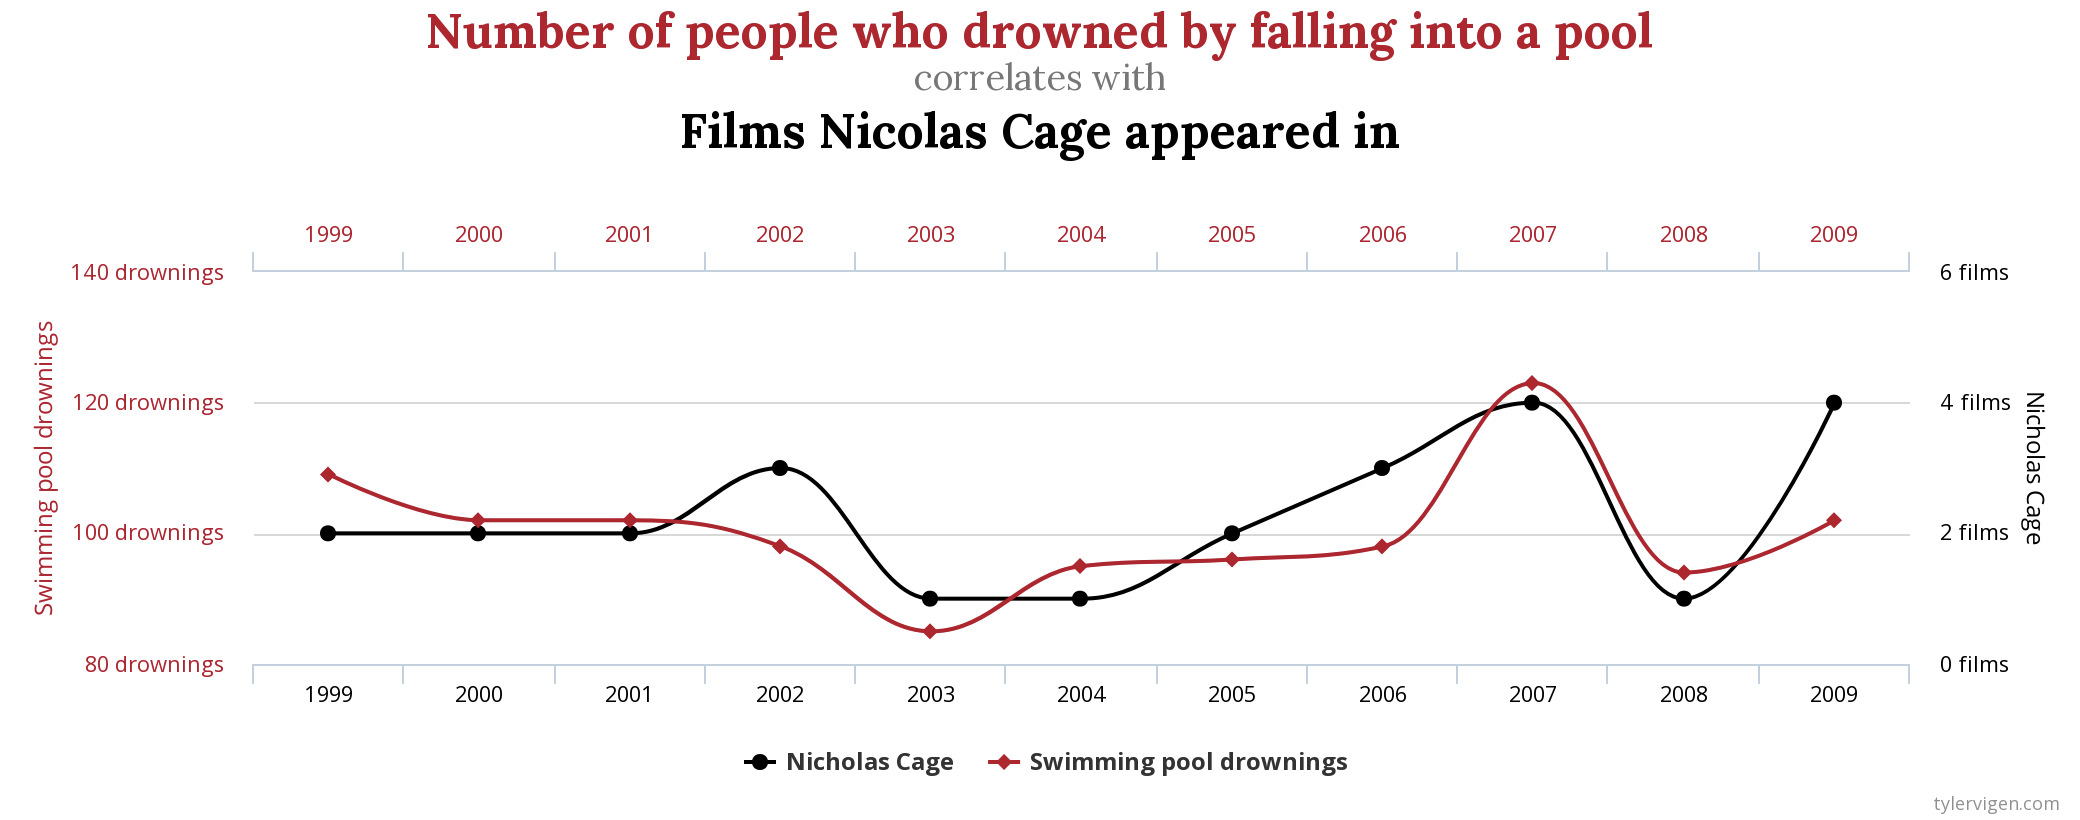

 Are there any correlations here that you believe? Can you think of an underlying mechanism for any of these?


3. We have the data from our previous suburban vs downtown spends. Recall that these are the same 100 customers, with  their spends at the two seperate stores. What is the correlation coefficient? What is the p-value? Is there a significant correlation between spending in the two stores? What is our null hypothesis?

In [ ]:
downtown = np.array([ 6.16781492,  5.94358729,  6.43670448,  5.83438109,  4.59740655,
        6.5987167 ,  6.25579492,  5.53172616,  6.63617687,  5.52645084,
        6.27981194,  7.61311604,  5.10035733,  5.31787547,  2.76749319,
        4.7061773 ,  6.77162198,  7.65986711,  7.13222776,  7.06753582,
        7.25683105,  7.46547649,  8.55341763,  6.72405068,  8.18494283,
        6.49900838,  7.23231703,  5.10370084,  5.35445115,  4.90087397,
        6.88795231,  3.36908949,  7.07820777,  7.12515795,  6.69422664,
        4.79042414,  4.13058467,  6.95158304,  6.16107586,  3.07035479,
        8.11788558,  6.58528057,  5.54679619,  6.24107998,  5.94192704,
        8.23925471,  6.90006506,  5.72848905,  5.94133112,  6.59649108,
        5.18022386,  6.70000213,  6.34827264,  3.21706128, 10.11179064,
        5.08581249,  6.02465168,  5.7598243 ,  6.34857665,  8.13143605,
        3.71101107,  4.38684511,  6.11496904,  3.22041089,  3.41620442,
        6.32476927,  6.61444147,  7.74518277,  5.58698373,  9.2866248 ,
        4.92216435,  4.35746432,  8.91432075,  7.491279  ,  6.55456246,
        5.57870171,  6.04979601,  5.25396298,  6.68610392,  7.31272142,
        9.75497588,  8.12785704,  3.94601057,  8.41661736,  5.78637068,
        6.25804514,  5.92421234,  7.52749338,  5.7943037 ,  6.99516776,
        6.50927286,  5.03164363,  5.26261662,  5.54526388,  5.27910527,
        8.19787641,  6.85165523,  4.30930063,  6.17221263,  7.16535078])

suburban = np.array([ 5.13920484,  6.75426048,  5.58153052,  5.7121821 ,  5.95538627,
        6.14678512,  7.27963452,  6.39129755,  8.7995925 ,  6.59370268,
        7.45501841,  7.904687  ,  6.17352763,  6.60604099,  3.36062447,
        5.71682809,  6.59791057,  7.26934162,  6.81069109,  7.40360827,
        6.20836211,  7.86814457,  7.62154151,  6.76465047,  7.37448348,
        5.14523268,  7.90599146,  4.69855432,  8.18447187,  7.25140922,
        7.73212583,  6.04416162,  6.63761497,  8.30610082,  5.93777163,
        7.55929426,  5.90590055,  5.80850774,  3.37638425,  2.71370597,
        7.21797769,  6.36236927,  5.85498861,  4.98070427,  4.54213199,
        7.84468703,  7.98068971,  7.88560082,  4.69554502,  8.24769007,
        5.93407739,  5.39525561,  6.57971133,  3.60216872,  8.80021531,
        5.03663791,  5.56189486,  6.71291433,  6.58190233,  7.63873711,
        5.1223466 ,  6.65320308,  6.96363551,  5.21484434,  6.0298979 ,
        8.70407414,  6.84192007,  6.0900138 ,  5.36151271,  7.75496176,
        4.04965853,  5.10293033,  9.34766805,  9.13065597,  5.15140385,
        4.01979658,  6.71131977,  5.68318444,  7.28061423,  5.67522685,
        9.70076102,  7.68807811,  3.93287031, 10.3531645 ,  5.00565511,
        8.46290026,  6.71803565,  7.46746906,  7.01823848,  7.26397545,
        4.95051691,  6.50165149,  7.01487523,  4.77302516,  5.03174573,
        7.07441853,  4.58504662,  6.49880348,  4.96543048,  8.56548526])

In [ ]:
#Our null hypoth is that there is no difference in the spending patterns between downtown and suburban locations
corr_coeff, pval = stats.pearsonr(downtown,suburban)
print(f"Correlation: {corr_coeff}, P-value: {pval}")
#Reject the null

plt.scatter(downtown, suburban)
plt.title('Suburban spends vs Downtown spends')
plt.xlabel('Downtown spends')
plt.ylabel('Suburban spends')
plt.show()

sns.lmplot('Downtown', 'Suburban', pd.DataFrame({'Downtown':downtown, 'Suburban':suburban}));

print(stats.linregress(downtown,suburban))

### Linear Regression

Linear regression is the method of describing the linear relationship between two **continuous variables**. While a correlation describes the dependence of a variable on another one, linear regression allows us to describe the relationship between them, and to predict new values of our dependant variables.

Basic linear regression models the dependant variable as a response of the one other. It is a statistical method for drawing a 'line of best fit' through data.

In [11]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

LinregressResult(slope=2.970546869307955, intercept=1.760390477520286, rvalue=0.6543806234623528, pvalue=1.54244640688963e-13, stderr=0.34674459389590256)
(0.6543806234623527, 1.5424464068896628e-13)


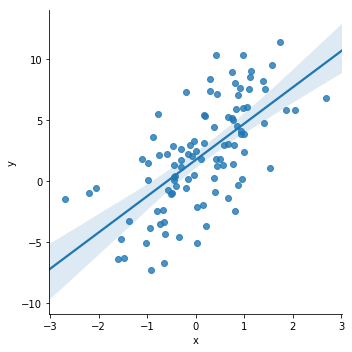

In [9]:
x = np.random.normal(size = 100)
y = 3 * x + np.random.normal(scale = 3, size = 100) + 2

sns.lmplot('x', 'y', pd.DataFrame({'x':x, 'y':y}));
print(stats.linregress(x,y))
print(stats.pearsonr(x,y))

In our example, we have a dependent variable, y, an independent variable, x, and an intercept.

We model our data as:

$$ y = \alpha + \beta X + \epsilon $$

Where $\alpha$ is the intercept, $\beta$ is the slope, and $\epsilon$ is the random error.

Looking at our data, we can see that we have generated data using: $\beta$ = 3, $\alpha$ = 2 and epsilon as a normal distribution:

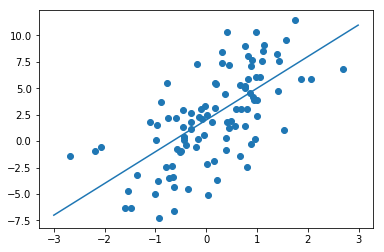

In [14]:
plt.scatter(x,y)
xvals = np.arange(-3, 3, 0.01)
yvals = 3*xvals + 2
plt.plot(xvals, yvals);

How do we calculate these values if we do not know the generating function?

Linear regression is also known as least squares, we want to minimize the squared difference from the line of best fit, by moving the line.

It can be seen as a linear algebra problem, an optimization problem, or a statistical problem. Whichever intuition works best for you is best, here is the formula:

$$ \beta = \frac{\sum\limits_{i=1}^{n}(X_i - \overline{X})(Y_i - \overline{Y})}{\sum\limits_{i=1}^{n}(X_i - \overline{X})^2}$$

In [ ]:
beta = np.sum((x - np.mean(x))*(y - np.mean(y)))/np.sum((x - np.mean(x))**2)
beta

Once we have the slope, we can calculate the intercept:

$$ \alpha = \overline{Y} - \beta\overline{X}$$

In [ ]:
alpha = np.mean(y) - beta * np.mean(x)
alpha

As always, there are built in functions to help us:

In [26]:
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)
slope, intercept
print(stats.linregress(x,y))

LinregressResult(slope=2.970546869307955, intercept=1.760390477520286, rvalue=0.6543806234623528, pvalue=1.54244640688963e-13, stderr=0.34674459389590256)


In [27]:
r_value**2

0.4282140003629776

What are the other 3 values: r_value, p_value, slope_std_error?

### Exercise

Use the help to figure out what the values are. What test do you think we did to get the p-value? Is this a useful test?

### Residuals

One other way of understanding this is that we have drawn a line, and minimized the sum of square of residuals to the line:

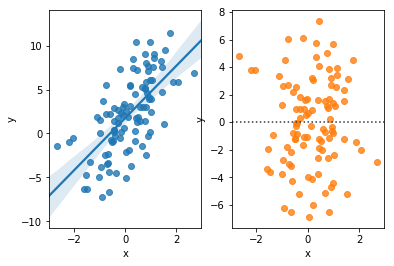

In [19]:
fig, ax = plt.subplots(1,2)

sns.regplot('x', 'y', pd.DataFrame({'x':x, 'y':y}), ax = ax[0]);
sns.residplot('x', 'y', pd.DataFrame({'x':x, 'y':y}), ax = ax[1]);

#Residuals are the differences between the line of best fit - i.e a plot of how far apart each point is to the line

One of the key diagnostics of a regression is plotting out the residuals. If we have any structure in there, it shows that we have variation left over in our data. In this case we have none, but check out below:

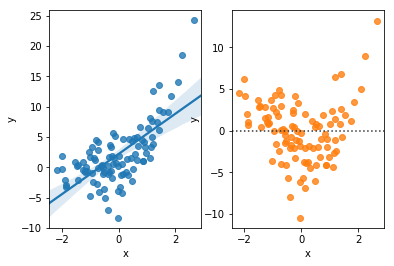

In [28]:
fig, ax = plt.subplots(1,2)
x = np.random.normal(size = 100)
y = 3 * x + np.random.normal(scale = 3, size = 100) + 2 *x**2
sns.regplot('x', 'y', pd.DataFrame({'x':x, 'y':y}), ax = ax[0]);
sns.residplot('x', 'y', pd.DataFrame({'x':x, 'y':y}), ax = ax[1]);

We can see that in this case, our data is not linear, and it is reflected in a U-shape in the residuals. In this case, it is an indication that linear regression was not a good choice for this data.

### Predictions

Given that we have the formula for our linear regression, we can predict data, for given values of x:

$$ \hat{y}=\alpha + \beta x $$

This does not include any error term. We could imagine that if we were making synthetic data we would add on the $\epsilon$ based on the standard deviation from the residuals.


In [29]:
newvalues = np.array([1,1.25, 3, 4])
newvalues * slope + intercept

array([ 4.73093735,  5.47357406, 10.67203109, 13.64257795])

### Exercises

We have sales data for the same customers at our two stores:

In [30]:
downtown = np.array([10.21240641, 16.99464177, 12.65820347, 12.96833094,  8.3315993 ,
       14.80814848, 11.95626477,  8.11941607, 13.27345826, 11.92686138,
        7.19194666, 13.74851741, 12.2959635 , 15.36488092,  8.27324712,
       11.40002627, 15.87159297, 14.6712836 , 15.39474915, 15.75666979,
       11.62323313, 16.05152854, 14.71411188, 10.29692081, 12.02822778,
       10.27456618,  8.29833721, 10.01762924, 13.08254342, 10.38880595,
       10.88280846, 15.2703245 , 13.39824774, 14.42027993, 11.93141642,
        8.78317581, 12.76896009, 12.18795779, 11.97155973, 14.11319683,
       11.95399479,  8.80374436, 10.05850438, 11.14425534, 10.08561843,
       13.0481885 , 14.17297545,  8.99995425, 14.53388276, 10.66785295,
       14.18470328, 11.44185382, 12.96842792,  9.90747776,  8.77710921,
       11.55643525, 11.4505927 ,  9.48645834,  9.95119598, 11.4370781 ,
        6.95807285, 14.24833754,  8.31957853, 13.07193331, 16.53978266,
        8.2821557 , 12.69803824,  7.98215665, 13.77710652,  8.16156536,
        9.58868186, 10.09709541, 10.25689084,  5.65129498, 12.23836126,
       14.28534426, 11.55725362, 11.81372826, 12.55939523, 12.38505456,
       12.46256971, 12.69994048, 15.66085019, 10.99416092, 10.36764754,
        9.63364075, 10.41532182, 10.99348236,  7.93445933, 13.89280006,
       13.63163916,  9.96176062, 10.45470687, 16.5534334 , 15.99936645,
       10.87925052, 14.19694865, 12.84652068, 13.19370114, 15.68026266])
suburban = np.array([23.41729514, 35.49440091, 28.75658064, 26.70134135, 19.38419986,
       34.25980143, 23.99792021, 18.40856806, 28.4752395 , 25.25992111,
       18.87852705, 28.35901739, 25.41860558, 30.57895794, 14.6258142 ,
       23.06821135, 29.68412954, 33.74320657, 31.90914497, 31.87820559,
       25.99635194, 30.85222895, 33.16219322, 21.73539379, 28.35005118,
       22.68683718, 20.52289958, 20.59114032, 31.11576504, 20.90267053,
       22.74362086, 30.11475459, 31.1349682 , 33.83398211, 25.06243305,
       18.99980398, 28.92016252, 27.01413549, 28.3405539 , 30.43081788,
       28.03403301, 20.58157805, 24.24429158, 23.41950524, 24.41301031,
       26.20257339, 29.2820386 , 19.5588075 , 32.53947227, 23.94849994,
       30.67364294, 24.23197992, 29.98637616, 21.76365614, 21.42209551,
       24.67445246, 26.74178036, 25.05878129, 18.76248637, 25.35164489,
       19.60138276, 26.42190211, 17.04415213, 29.81726268, 35.7572353 ,
       15.48311007, 30.08528392, 19.29940237, 26.48326879, 21.67888816,
       23.86080215, 22.35669187, 22.25421314, 16.2565294 , 25.77533606,
       29.96114291, 25.0791999 , 25.2387763 , 28.164434  , 27.50182926,
       26.25761716, 29.67157509, 38.5450505 , 24.99931961, 21.84969897,
       21.18497173, 21.60436699, 20.72170368, 17.04470794, 29.85142968,
       26.15322362, 19.13117257, 24.21778418, 35.43580789, 35.14007477,
       21.11315315, 30.37652151, 23.71600831, 29.2820716 , 35.84927249])

1. Plot the two against each other. Do they look like they have a linear relationship?

2. What is the correlation coefficient and covariance between the two data sets?

3. Run a Wald-test (T-test for correlation), are they correlated?

4. Run a linear regression, what is the slope and intercept?

5. We have 5 customers with spends at the downtown store of 7, 11, 15 and 25 dollars. What is the predicted spend of each of these customers? Any problems with these predictions?

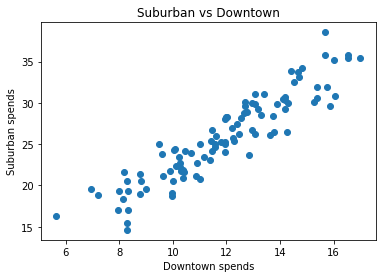

Correlation coeff: 0.9233012231357967, covariance: [[ 6.19230378 11.88708616]
 [11.88708616 26.76774251]]
Correlation coeff: 0.9233012231357967, with P-value of 1.6295921838491254e-42


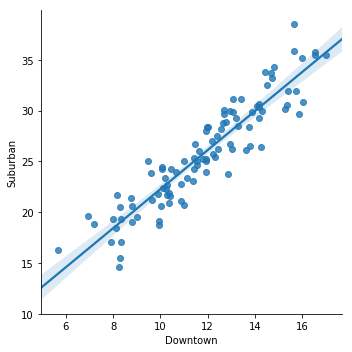

LinregressResult(slope=1.9196548792445856, intercept=3.0680554949488155, rvalue=0.9233012231357964, pvalue=1.629592183849339e-42, stderr=0.08066489658130718)
New downtown spends: [ 7 11 15 25]. Predicted Suburban spends: [16.5 24.2 31.9 51.1]
R square: 0.8524851486440578, std error: 0.08066489658130718


In [70]:
#1
plt.scatter(downtown, suburban)
plt.title('Suburban vs Downtown')
plt.xlabel('Downtown spends')
plt.ylabel('Suburban spends')
plt.show()
#2 -- note: np.corrcoef just returns correlation coefficient but not the p-value. To actually see both use the stats.pearsonr()
#np.corrcoef(downtown, suburban)
#np.cov(downtown, suburban)
print(f'Correlation coeff: {np.corrcoef(downtown, suburban)[0,1]}, covariance: {np.cov(downtown, suburban)}')

#3 - this is the Wald's Test - this can be used to test for other relations, not just linear coefficients
corr, pval = stats.pearsonr(downtown, suburban)
print(f'Correlation coeff: {corr}, with P-value of {pval}')  #statistically significant correlation

#4
sns.lmplot('Downtown', 'Suburban', pd.DataFrame({'Downtown':downtown, 'Suburban':suburban}));
plt.show()

#sns.regplot('Downtown', 'Suburban', pd.DataFrame({'Downtown':downtown, 'Suburban':suburban}));
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(downtown, suburban)
print(stats.linregress(downtown,suburban))

#5- predicting suburban spends for the new downtown spends
new_spends = np.array([7,11,15,25])
pred_new_spends = new_spends*slope + intercept

print(f'New downtown spends: {new_spends}. Predicted Suburban spends: { np.round(pred_new_spends,1)}')
print(f"R square: {r_value**2}, std error: {slope_std_error}")

#This model is built around a specific range of data, and we see that the confidence interval expands as we 
#get into higher downtown spending, so its gets more difficult to predict in higher ranges. Also, models are best used
#to predict in ranges around where they were built

### Linear Model Diagnostics

We have residuals, correlation coefficient and more, from scipy.

Linear models have been around for some time though, so we can use the `statsmodels` library to get some more information on our regression, from a statistical viewpoint:

In [73]:
from statsmodels.regression import linear_model
import statsmodels.api as sm

In [76]:
#display(x)
X = sm.add_constant(x) #we have to add in our intercept manually! ALlows for vector multiplication <beta, alpha> * <x, 1>
#display(X)
myregression = linear_model.OLS(y,X).fit() #this saves the linear model. OLS stands for ordinary-least-squares
myregression.summary()

#R-squared is the amount of variance thats explained by the model
#const is the alpha, x1 is the x

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     87.31
Date:                Fri, 25 Jan 2019   Prob (F-statistic):           3.22e-15
Time:                        13:46:44   Log-Likelihood:                -270.45
No. Observations:                 100   AIC:                             544.9
Df Residuals:                      98   BIC:                             550.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2031      0.366      6.024      0.000       1.477       2.929
x1             3.3042      0.354      9.344      0.000       2.602       4.006
==============================================================================
Omnibus:                        5.968   Durbin-Watson:                   2.305
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                7.637
Skew:                           0.254   Prob(JB):                       0.0220
Kurtosis:                       4.255   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([ 1.,  5., 12., 22., 26., 22.,  7.,  3.,  1.,  1.]),
 array([-10.42656298,  -8.06013683,  -5.69371067,  -3.32728452,
         -0.96085837,   1.40556779,   3.77199394,   6.13842009,
          8.50484625,  10.8712724 ,  13.23769855]),
 <a list of 10 Patch objects>)

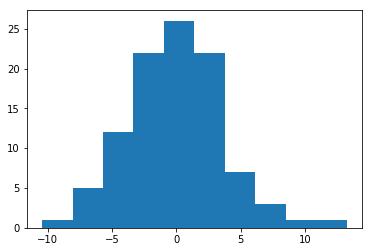

In [82]:
myregression.resid
plt.hist(myregression.resid)

This is a much more useful object. We will cover statsmodels in more detail next week.

### Exercise

The following is a famous data set:

In [ ]:
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

pairs = (x, y1), (x, y2), (x, y3), (x4, y4)

For each pair, carry out a regression using stats.linregress. Take a look at the output values.

Plot the values, and the residuals of the regression. What does this dataset tell you about regressions?

### Polynomial Regression

We can generalize this type of regression to a polynomial situation, rather than leave the equation linear:

$$ y = \beta_0 + \beta_1x + \beta_2x^2 + \ldots +\beta_nx^n + \epsilon $$

A model like this has some issues depending on the interpreblity of the model. While we can understand that 'the price of a house increases with it's size, or with the square of it's size', it might not make sense to include the price^4.

However, polynomial fitting is common in many scientific models, and fills a useful gap between linear models and more complex models.

We can plot some curves of how we expect the values to look:

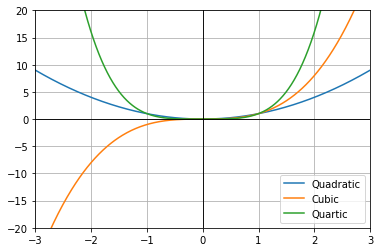

In [149]:
poly_x = np.arange(-3,3,0.01)
plt.plot(poly_x, poly_x**2, label='Quadratic');
plt.plot(poly_x, poly_x**3, label='Cubic');
plt.plot(poly_x, poly_x**4, label='Quartic');
plt.plot(poly_x, poly_x*0, color='black',linewidth=0.90)
plt.axvline(x=0,color='black', linewidth=0.9)
plt.grid()
plt.legend()
plt.ylim(-20,20)
plt.xlim(-3,3);

We will skip the formula here and jump straight to the function. We can use the numpy.polynomial function polyfit:

In [151]:
x_q = np.array([0,0.9,1.5,2.1,2.4,2.9,3.1,3.8,4.4,5.5])
y_q = np.array([-7.3, -2.1, -0.45, 1.39, 1.14, 1.92, 2.05, 1.26, 0.09, -4.35])
x_r = np.arange(0,6,0.01)

int_q, sl_q = np.polynomial.polynomial.polyfit(x_q, y_q, 1)
p0, p1, p2 = np.polynomial.polynomial.polyfit(x_q, y_q, 2)

We simply increase the number of points, until we have reached the desired polynomial fit.

In this case, a quadratic fit is a much better fit than a linear regression:

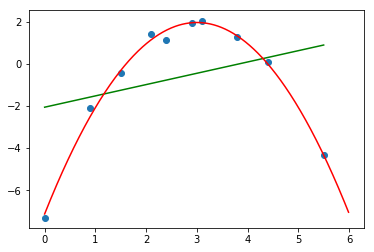

In [152]:
plt.scatter(x_q,y_q)
plt.plot(x_q,int_q + sl_q*x_q , color='green');
plt.plot(x_r,p0 + p1*x_r + p2*(x_r**2), color='red');

### Overfitting

However, when using polynomial fits we generally do not want to simply increase the degree of the polynomial. We will quickly overfit to our data:


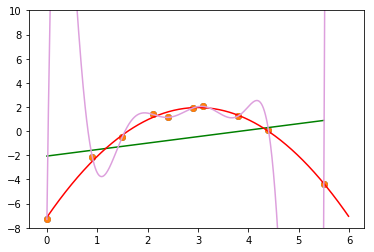

In [153]:
coefs = np.polynomial.polynomial.polyfit(x_q, y_q, 10)

def polycalc(coefs, x):
    '''
    a quick and dirty polynomial evaluator
    
    Parameters
    ----------
    coefs: An iterable of coefs in order from 0 to n
    x: The value to eval the polynomial at
    
    Returns
    -------
    val: The evald value
    '''
    val = 0
    for i, j in enumerate(coefs):
        val += j * x**i
    return val

yvals = [polycalc(coefs, i) for i in x_r]

plt.scatter(x_q,y_q);
plt.scatter(x_q,y_q)
plt.plot(x_q,int_q + sl_q*x_q , color='green');
plt.plot(x_r,p0 + p1*x_r + p2*(x_r**2), color='red');
plt.plot(x_r,yvals, color='plum');
plt.ylim(-8,10);

In [ ]:
#with 10 data poitns, we can find a polynomial function with degree 9 to fit it perfectly
#likewise for 3 data points we can find a quadtratic (2 degree func) to perfectly fit.
# n data points - 1 = degrees of ply func.

This is almost certainly a worse fit than either of the other two models, even though we exactly touch every data point,our predicted value at 5 is completely off:

In [ ]:
polycalc(coefs, 5)

We will discuss ways to combat overfitting as we continue through the course.

### Multiple Linear Regression

Rather than increasing the order of x, a more common generalization is to add more variables to the model.

In this case, we could imagine the model where price is a function of size, plus number of bedrooms, plus number of bathrooms plus......

Here we also run the risk of overfitting, although, as we require a linear term for each parameter, it will be harder to overfit the data.

For example, we can model a dependant variable as the outcome of two independant variables:

$$ y = \beta_0 + \beta_1x_1 + \beta_2x_2. $$

We can rapidly increase the number of variables here, to make the model arbitrarily complex I have run linear models with over 8000 independent variables.

If we keep the dimensions low, we can still plot and gain a sensible interpretation of the output.

Let's use the example dataset here: MLR.csv - https://drive.google.com/file/d/19NgWK34NK5fGCA2eU4rDJ_Fo45nnQIi_/view?usp=sharing


In [85]:
dfm = pd.read_csv('data/MLR.csv')
dfm.head(5)

,Marketing Budget,Website Visits,Number of Sales
0,0.5,0.5,1
1,0.5,1.3,0
2,0.3,0.2,2
3,0.3,0.7,5
4,0.4,0.6,5


We can carry out a multiple linear regression using statsmodels. We will get the values from the array, and add an intercept:

In [104]:
X = sm.add_constant(dfm[['Marketing Budget', 'Website Visits']].values)
y = dfm['Number of Sales'].values

In [105]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     6983.
Date:                Fri, 25 Jan 2019   Prob (F-statistic):          5.05e-180
Time:                        14:54:26   Log-Likelihood:                -610.95
No. Observations:                 195   AIC:                             1228.
Df Residuals:                     192   BIC:                             1238.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0982      0.839      0.117      0.907      -1.557       1.753
x1             3.6367      0.593      6.137      0.000       2.468       4.805
x2             6.5617      0.302     21.701      0.000       5.965       7.158
==============================================================================
Omnibus:                        1.065   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.587   Jarque-Bera (JB):                1.139
Skew:                           0.171   Prob(JB):                        0.566
Kurtosis:                       2.847   Cond. No.                         27.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we have our model! We can predict how much our sales will increase as we increase our budget, 3.6367 for each unit increase in budget. We can predict that if our website visits increase, we will also increase our sales.

### Exercises

Use the `customer_info.csv`: https://drive.google.com/file/d/169_fyI_omErKtoMu5Z9PCNZhsefi_bET/view?usp=sharing for these questions. Use the statsmodels package, take a look at the `statsmodels.formula.api` documentation here:<br>
http://www.statsmodels.org/dev/example_formulas.html<br> for an easier interface

  1.  The big Telecom that you work for is interested in the relationship between the number of employees who work at a company, and how much they spend on different products. Perform two linear regressions, each with EMP as the independent variable, but with MOBILITY as the dependent variable in one and INTERNET as the dependent variable in the other. Describe in words, the relationship between each of these revenue categories and the number of employees at a company. Do these results make sense to you? Why or why not?
  2.   We are now interested in how the relationship between Mobility revenue and employees changes across different industries. Pick two industries to investigate and create two data frames, each with data on one of your chosen industries. Run a regression on each data frame to see how the relationship between the number of employees changes between industries. Describe your findings in words. (Note: it would be good if we could organize ourselves so that at least one person is doing each possible pair of industries.)
  3. Repeat the same exercise with Internet revenue instead of Mobility.
  4.  Use your findings to make a recommendation to the marketing team about how they could use information about how many employees work at companies to create campaigns with the highest return.

In [90]:
cust_data = pd.read_csv('customer_info.csv')
cust_data.head()

,CUSTOMER_ID,INDUSTRY,EMP,ANNUAL_SALES,PROVINCE,MOBILITY,INTERNET
0,129078,Finance and Insurance,36.0,NaN,AB,10192.825459,699.539869
1,128424,Construction,261.0,10675108.0,BC,17367.492873,1907.819410
2,125960,Finance and Insurance,10.0,756786.0,AB,6162.609229,1789.017919
3,120981,Construction,31.0,1223808.0,BC,19176.373541,2123.016418
4,129251,Education,NaN,1148650.0,AB,1538.194116,1620.096543


In [123]:
cust_data.isna().sum()
#cust_data.info()

CUSTOMER_ID        0
INDUSTRY         109
EMP             1243
ANNUAL_SALES     522
PROVINCE           0
MOBILITY           0
INTERNET           0
dtype: int64

In [ ]:
#emp has a lot of NANs so for making the model, use rows where emp is not na
#Mobility and Internet may have 0 values, remove them as well

In [126]:
#could also do:
#df = df.dropna(subset=['EMP'])

cust_data_emp_cleaned = cust_data[(~cust_data['EMP'].isna()) & (cust_data['MOBILITY'] > 0) & (cust_data['INTERNET']> 0)]
cust_data_emp_cleaned.info()
#now both emp and mobility have same number of valid rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8073 entries, 0 to 9999
Data columns (total 7 columns):
CUSTOMER_ID     8073 non-null int64
INDUSTRY        7986 non-null object
EMP             8073 non-null float64
ANNUAL_SALES    7668 non-null float64
PROVINCE        8073 non-null object
MOBILITY        8073 non-null float64
INTERNET        8073 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 504.6+ KB


In [127]:
x_emp = sm.add_constant(cust_data_emp_cleaned['EMP'].values)
y_mob = cust_data_emp_cleaned['MOBILITY'].values
y_inter = cust_data_emp_cleaned['INTERNET'].values

In [128]:
model_mob = sm.OLS(y_mob,x_emp).fit()
model_mob.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     4105.
Date:                Fri, 25 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:19:55   Log-Likelihood:                -80474.
No. Observations:                8073   AIC:                         1.610e+05
Df Residuals:                    8071   BIC:                         1.610e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3227.5812     65.722     49.109      0.000    3098.748    3356.414
x1            24.8465      0.388     64.072      0.000      24.086      25.607
==============================================================================
Omnibus:                     5966.183   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           217146.435
Skew:                           3.154   Prob(JB):                         0.00
Kurtosis:                      27.612   Cond. No.                         194.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
model_inter = sm.OLS(y_inter,x_emp).fit()
model_inter.summary()

#r-squared is saying only 3% of variance is explained by internet sales, so its not very useful to predict internet sales by emp -- this is not the best model then

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     247.6
Date:                Fri, 25 Jan 2019   Prob (F-statistic):           5.76e-55
Time:                        15:20:10   Log-Likelihood:                -76467.
No. Observations:                8073   AIC:                         1.529e+05
Df Residuals:                    8071   BIC:                         1.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3385.3570     40.010     84.612      0.000    3306.926    3463.788
x1             3.7145      0.236     15.734      0.000       3.252       4.177
==============================================================================
Omnibus:                     1737.741   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3125.696
Skew:                           1.390   Prob(JB):                         0.00
Kurtosis:                       4.252   Cond. No.                         194.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

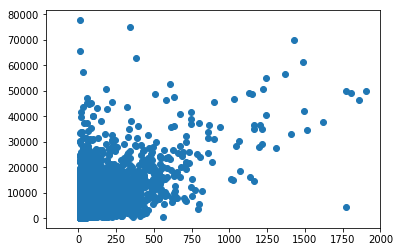

In [148]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.scatter(cust_data_emp_cleaned['EMP'].values, cust_data_emp_cleaned['MOBILITY'].values)
plt.xlim(right = 2000)
plt.show()

We see from both models where EMP is the indepenent and Mobility sales and Internet sales
as respective dependent variables, that as the number of EMP increases, the sales increase as well. 
Their correlations of 24.8 and 3.7 are statistically significant with P values < 0.05

In [131]:
#2 - lets look at the following two industries: Construction and Education
const_df = cust_data_emp_cleaned[cust_data_emp_cleaned['INDUSTRY']=='Construction']
edu_df = cust_data_emp_cleaned[cust_data_emp_cleaned['INDUSTRY']=='Education']

const_df.head()
edu_df.head()

,CUSTOMER_ID,INDUSTRY,EMP,ANNUAL_SALES,PROVINCE,MOBILITY,INTERNET
8,122024,Education,248.0,NaN,AB,4468.821223,9592.091142
33,127889,Education,56.0,1132384.0,BC,3920.216001,2301.588190
46,129997,Education,31.0,1115725.0,AB,1538.507768,6350.126248
62,120214,Education,254.0,9074471.0,BC,3028.171423,9659.980952
73,127881,Education,64.0,1939441.0,BC,4292.842743,1733.082514


In [136]:
x_const = sm.add_constant(const_df['EMP'].values)
y_const = const_df['MOBILITY'].values

x_edu = sm.add_constant(edu_df['EMP'].values)
y_edu = edu_df['MOBILITY'].values

In [137]:
#Contrustion Mobility vs EMP
model_mob = sm.OLS(y_const,x_const).fit()
model_mob.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     1351.
Date:                Fri, 25 Jan 2019   Prob (F-statistic):          2.83e-218
Time:                        15:34:11   Log-Likelihood:                -17474.
No. Observations:                1705   AIC:                         3.495e+04
Df Residuals:                    1703   BIC:                         3.496e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6776.4434    199.389     33.986      0.000    6385.370    7167.517
x1            23.7955      0.647     36.759      0.000      22.526      25.065
==============================================================================
Omnibus:                      938.491   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12457.923
Skew:                           2.289   Prob(JB):                         0.00
Kurtosis:                      15.426   Cond. No.                         371.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
#Education Mobility vs EMP
model_mob = sm.OLS(y_edu,x_edu).fit()
model_mob.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.177
Date:                Fri, 25 Jan 2019   Prob (F-statistic):             0.0413
Time:                        15:31:35   Log-Likelihood:                -7650.9
No. Observations:                 795   AIC:                         1.531e+04
Df Residuals:                     793   BIC:                         1.532e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3968.0999    162.803     24.374      0.000    3648.523    4287.676
x1             4.1033      2.008      2.044      0.041       0.162       8.044
==============================================================================
Omnibus:                      536.140   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6541.893
Skew:                           2.955   Prob(JB):                         0.00
Kurtosis:                      15.750   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that both industrys have statistically significant correlations between Mobility sales and employee numbers (as EMP increases so does Mobility sales)
however it should be noted that the P value for the correlation in Education was 0.041 compared to 0.000 for Construction. Also it should be noted that 
the corr coef is much lower in Education than Construction (4.10 vs 23.80), indicating that the EMP-Mobility relationship or effect is weaker in the Education Industry

In [141]:
#Repeat Construction and Education - EMP vs Internet
x_const = sm.add_constant(const_df['EMP'].values)
y_const_int = const_df['INTERNET'].values

x_edu = sm.add_constant(edu_df['EMP'].values)
y_edu_int = edu_df['INTERNET'].values

In [142]:
#Construction Internet vs EMP
model_mob = sm.OLS(y_const_int,x_const).fit()
model_mob.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     25.14
Date:                Fri, 25 Jan 2019   Prob (F-statistic):           5.90e-07
Time:                        15:55:36   Log-Likelihood:                -16411.
No. Observations:                1705   AIC:                         3.283e+04
Df Residuals:                    1703   BIC:                         3.284e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4156.7787    106.877     38.893      0.000    3947.154    4366.404
x1             1.7397      0.347      5.014      0.000       1.059       2.420
==============================================================================
Omnibus:                      209.184   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.128
Skew:                           1.014   Prob(JB):                     2.23e-64
Kurtosis:                       2.896   Cond. No.                         371.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
#Education Internet vs EMP
model_mob = sm.OLS(y_edu_int,x_edu).fit()
model_mob.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     57.29
Date:                Fri, 25 Jan 2019   Prob (F-statistic):           1.04e-13
Time:                        15:55:42   Log-Likelihood:                -7487.3
No. Observations:                 795   AIC:                         1.498e+04
Df Residuals:                     793   BIC:                         1.499e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2965.2403    132.518     22.376      0.000    2705.113    3225.368
x1            12.3696      1.634      7.569      0.000       9.162      15.577
==============================================================================
Omnibus:                      163.158   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.948
Skew:                           1.324   Prob(JB):                     1.46e-59
Kurtosis:                       4.081   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#4We see inernet sales do better for school employees and mobility sales do better with construction employees.

In [ ]:
#to predict using more than one var
#x_both = sm.add_constant(df[['MOBILITY','INTERNET']].values)
#model = sm.OLS(y_int, x_both).fit()
#model.summary()